In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [2]:
data = pd.read_json('https://raw.githubusercontent.com/alura-cursos/2570-regressao-com-sklearn/main/dados/imoveis.json',
                    orient='columns')

### Exploring Information

In [3]:
data.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


In [4]:
data.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [5]:
data.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### Data Treatment

##### Normalization

In [6]:
data_list1 = pd.json_normalize(data.ident)
data_list1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [7]:
data_list2 = pd.json_normalize(data.listing, sep='_')
data_list2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [8]:
# concat dataframes
data_houses = pd.concat([data_list1, data_list2], axis=1)
data_houses.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [9]:
data_houses.shape

(73615, 21)

In [10]:
for col in data_houses.columns:
    print('='*60)
    print(data_houses[col].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

### Pre processing

##### Cleaning Dataset

In [11]:
# filter
filter = (data_houses.types_usage == 'Residencial')\
    & (data_houses.address_city == 'Rio de Janeiro')
data_houses = data_houses[filter]
data_houses.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [12]:
# variable types
data_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

##### Our index is incorrect, we'll fix this problem

In [13]:
data_houses.reset_index(drop=True, inplace=True)
data_houses.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [14]:
# change variables types
data_houses = data_houses.astype({
    'prices_price':'float64',
    'prices_tax_iptu':'float64',
    'prices_tax_condo':'float64',
    'features_usableAreas':'int64',
    'features_totalAreas':'int64'
})

data_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [15]:
# checking null data
data_houses.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [16]:
data_houses.address_zone = data_houses.address_zone.replace('', np.nan)
data_houses.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
Name: address_zone, dtype: int64

In [17]:
data_houses.address_zone.isnull().sum()

149

In [18]:
dic = data_houses[~data_houses['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')

In [19]:
dic_zone = {x['address_neighborhood']: x['address_zone'] for x in dic}

In [20]:
for neigh, zone in dic_zone.items():
    data_houses.loc[data_houses['address_neighborhood'] == neigh, 'address_zone'] = zone

data_houses.address_zone.isnull().sum()

0

##### checking null values in prices_tax_iptu variables

In [21]:
mean_tax_iptu = data_houses.prices_tax_iptu.mean()
median_tax_iptu = data_houses.prices_tax_iptu.median()
mode_tax_iptu = data_houses.prices_tax_iptu.mode()
mean_tax_iptu, median_tax_iptu, mode_tax_iptu

(4379.018845604061,
 380.0,
 0    0.0
 Name: prices_tax_iptu, dtype: float64)

In [22]:
(data_houses['prices_tax_iptu'] == 0.0).sum()

9026

In [23]:
(data_houses['prices_tax_iptu'] >= 4.000).sum()

49931

In [24]:
(data_houses['prices_tax_iptu'] <= 5.000).sum()

10940

In [25]:
data_houses.shape

(69588, 21)

In [26]:
49931 / 69588

0.7175231361729034

##### checking null values in prices_tax_condo variables

In [27]:
mean_tax_condo = data_houses.prices_tax_condo.mean()
median_tax_condo = data_houses.prices_tax_condo.median()
mode_tax_condo = data_houses.prices_tax_condo.mode()
mean_tax_condo, median_tax_condo, mode_tax_condo

(3616.081162340422,
 800.0,
 0    0.0
 Name: prices_tax_condo, dtype: float64)

In [28]:
(data_houses['prices_tax_condo'] == 0.0).sum()

5926

In [29]:
(data_houses['prices_tax_condo'] >= 3.000).sum()

56384

In [30]:
(data_houses['prices_tax_iptu'] <= 4.000).sum()

10936

In [31]:
56384 / 69588

0.8102546416048744

In [32]:
# apply variables
data_houses.prices_tax_iptu.fillna(mean_tax_iptu, inplace=True)
data_houses.prices_tax_condo.fillna(mean_tax_condo, inplace=True)

In [33]:
data_houses.prices_tax_iptu.isnull().sum(), data_houses.prices_tax_condo.isnull().sum()

(0, 0)

### Changing columns

In [34]:
data_houses.columns

Index(['customerID', 'source', 'types_unit', 'types_usage', 'address_city',
       'address_location_lon', 'address_location_lat', 'address_zone',
       'address_neighborhood', 'prices_price', 'prices_tax_iptu',
       'prices_tax_condo', 'features_bedrooms', 'features_bathrooms',
       'features_suites', 'features_parkingSpaces', 'features_usableAreas',
       'features_totalAreas', 'features_floors', 'features_unitsOnTheFloor',
       'features_unitFloor'],
      dtype='object')

In [35]:
data_houses = data_houses[['types_unit', 'types_usage',  'address_zone', 'prices_price', 'prices_tax_iptu',
       'prices_tax_condo', 'features_bedrooms', 'features_bathrooms', 'features_suites', 'features_parkingSpaces',
       'features_usableAreas', 'features_totalAreas', 'features_floors', 'features_unitsOnTheFloor', 
       'features_unitFloor']]

In [36]:
data_houses.columns

Index(['types_unit', 'types_usage', 'address_zone', 'prices_price',
       'prices_tax_iptu', 'prices_tax_condo', 'features_bedrooms',
       'features_bathrooms', 'features_suites', 'features_parkingSpaces',
       'features_usableAreas', 'features_totalAreas', 'features_floors',
       'features_unitsOnTheFloor', 'features_unitFloor'],
      dtype='object')

In [37]:
data_houses.columns = [['unit', 'zone', 'price', 'tax_iptu', 'tax_condo', 'bedrooms',
                           'bathrooms', 'suites', 'parkingSpaces', 'usableAreas', 'totalAreas',
                           'floors', 'unitsOnTheFloor', 'unitFloor']]

In [38]:
data_houses.head()

,unit,usage,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Residencial,Zona Oeste,45000.0,0.000000,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Zona Oeste,45000.0,0.000000,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Zona Oeste,50000.0,0.000000,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Residencial,Zona Oeste,50000.0,120.000000,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Residencial,Zona Oeste,50000.0,4379.018846,0.0,0,0,0,0,200,200,0,0,0


## Linear Regression

In [39]:
correlation = data_houses.corr()
correlation

/tmp/ipykernel_11475/1572059520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data_houses.corr()


,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.028920,0.047136,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.028920,1.000000,0.226136,0.013028,0.014553,0.018769,0.009277,0.013970,-0.000179,0.005477,0.003883,0.000904
tax_condo,0.047136,0.226136,1.000000,0.018487,0.019718,0.023605,0.018032,0.019707,-0.000336,0.012151,-0.002053,0.002680
bedrooms,0.530474,0.013028,0.018487,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.014553,0.019718,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.018769,0.023605,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009277,0.018032,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.013970,0.019707,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000179,-0.000336,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.005477,0.012151,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


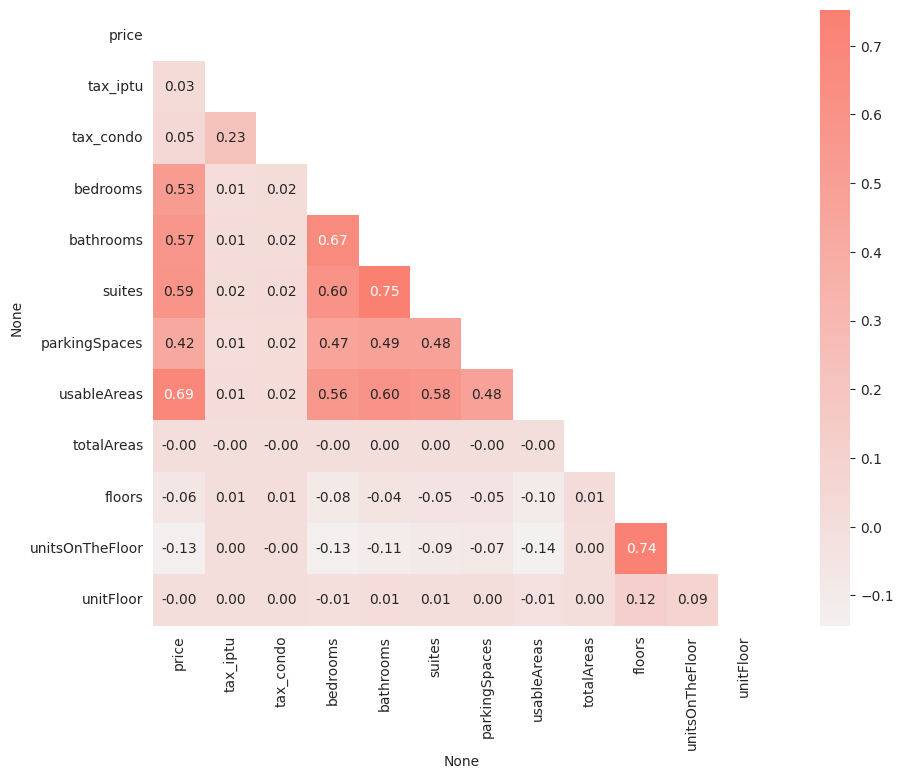

In [40]:
colors = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlation, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)

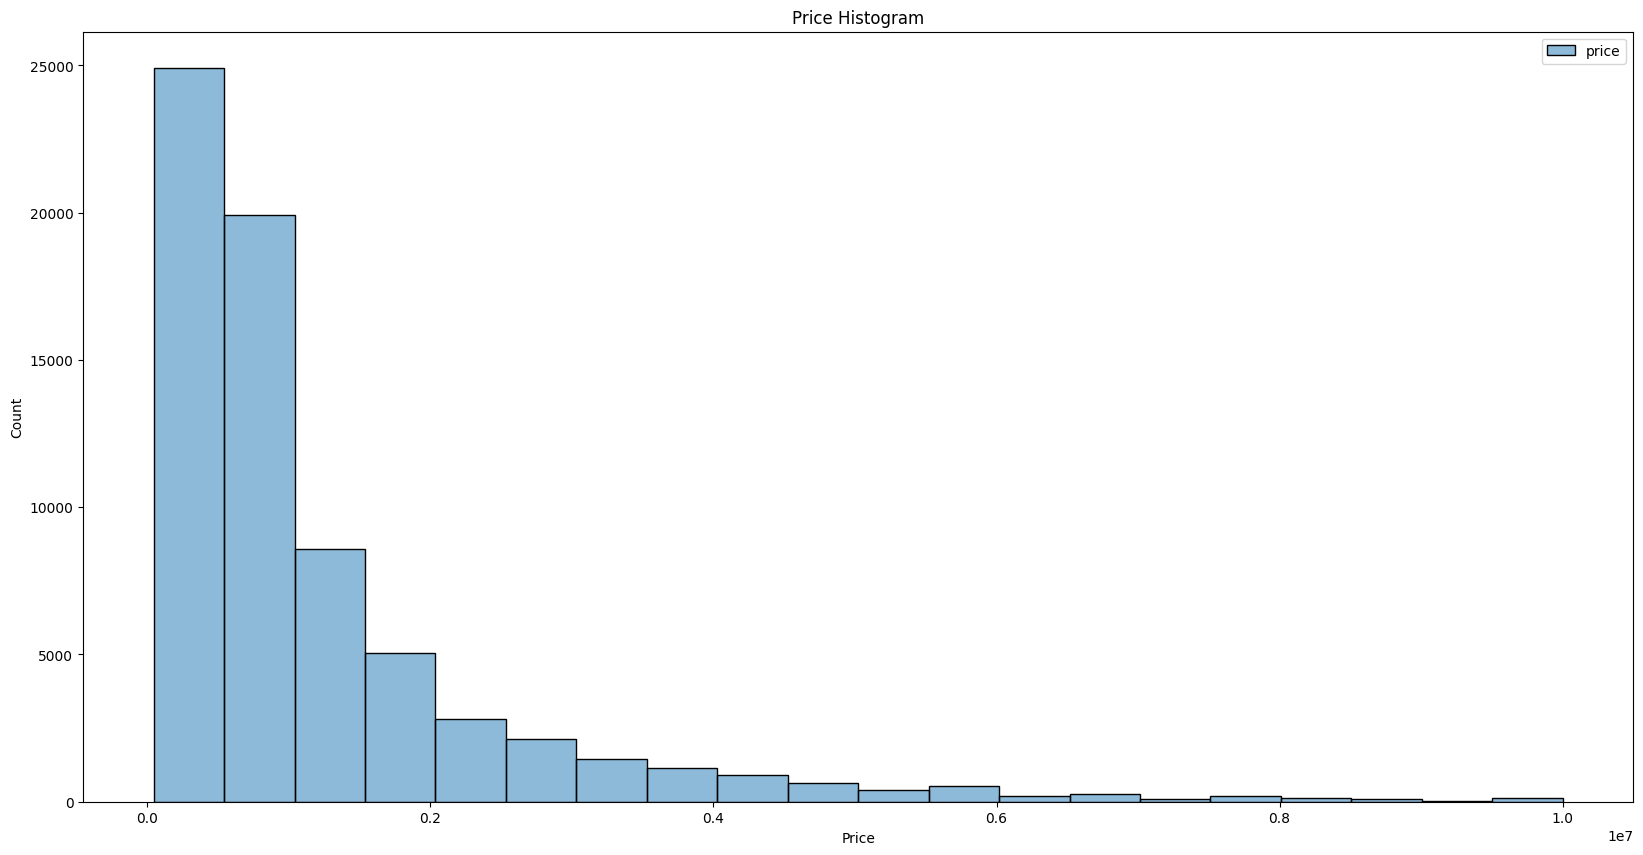

In [41]:
ax = sns.histplot(data=data_houses.price, bins=20)
ax.figure.set_size_inches(20,10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price');

### Pre Processing

In [43]:
tranformer = FunctionTransformer(np.log1p, validate=True)
data_transformed = tranformer.transform(data_houses.select_dtypes(exclude=['object']))
col_data_tranf = data_houses.select_dtypes(exclude=['object']).columns
data_transf = pd.concat([data_houses.select_dtypes(include=['object']),
                        pd.DataFrame(data_transformed, columns=col_data_tranf)],axis=1)

data_transf.head()

,unit,usage,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Residencial,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Residencial,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Residencial,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Residencial,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Residencial,Zona Oeste,10.819798,8.384808,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


/tmp/ipykernel_11475/2378531803.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_tranf = data_transf.corr()


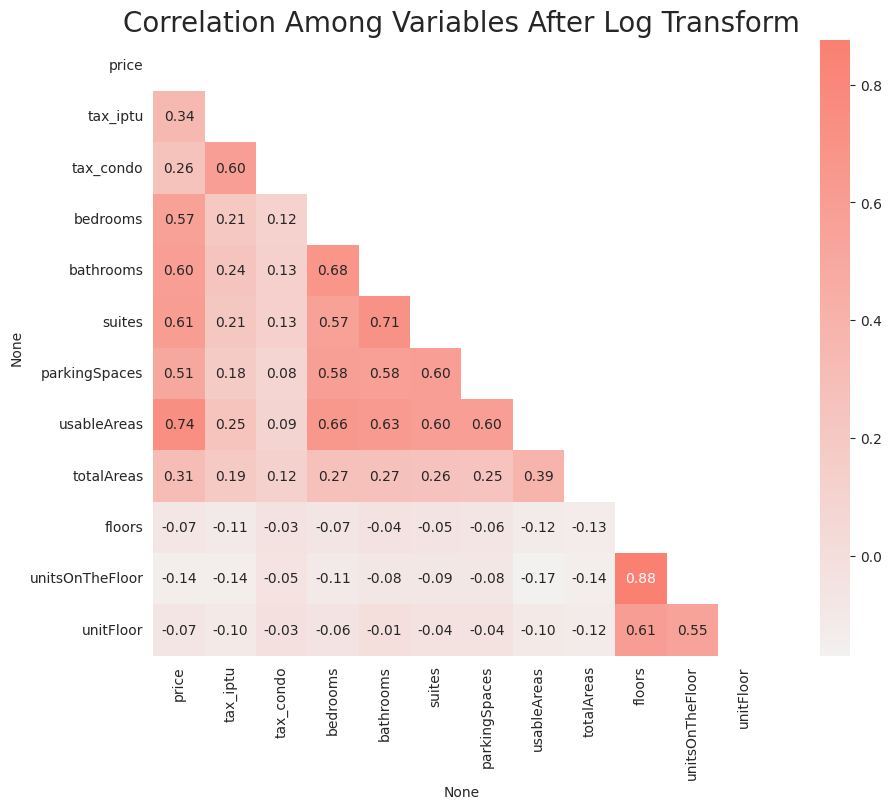

In [46]:
corr_tranf = data_transf.corr()
mask = np.zeros_like(corr_tranf)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(corr_tranf, cmap=colors, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlation Among Variables After Log Transform', fontsize=20);

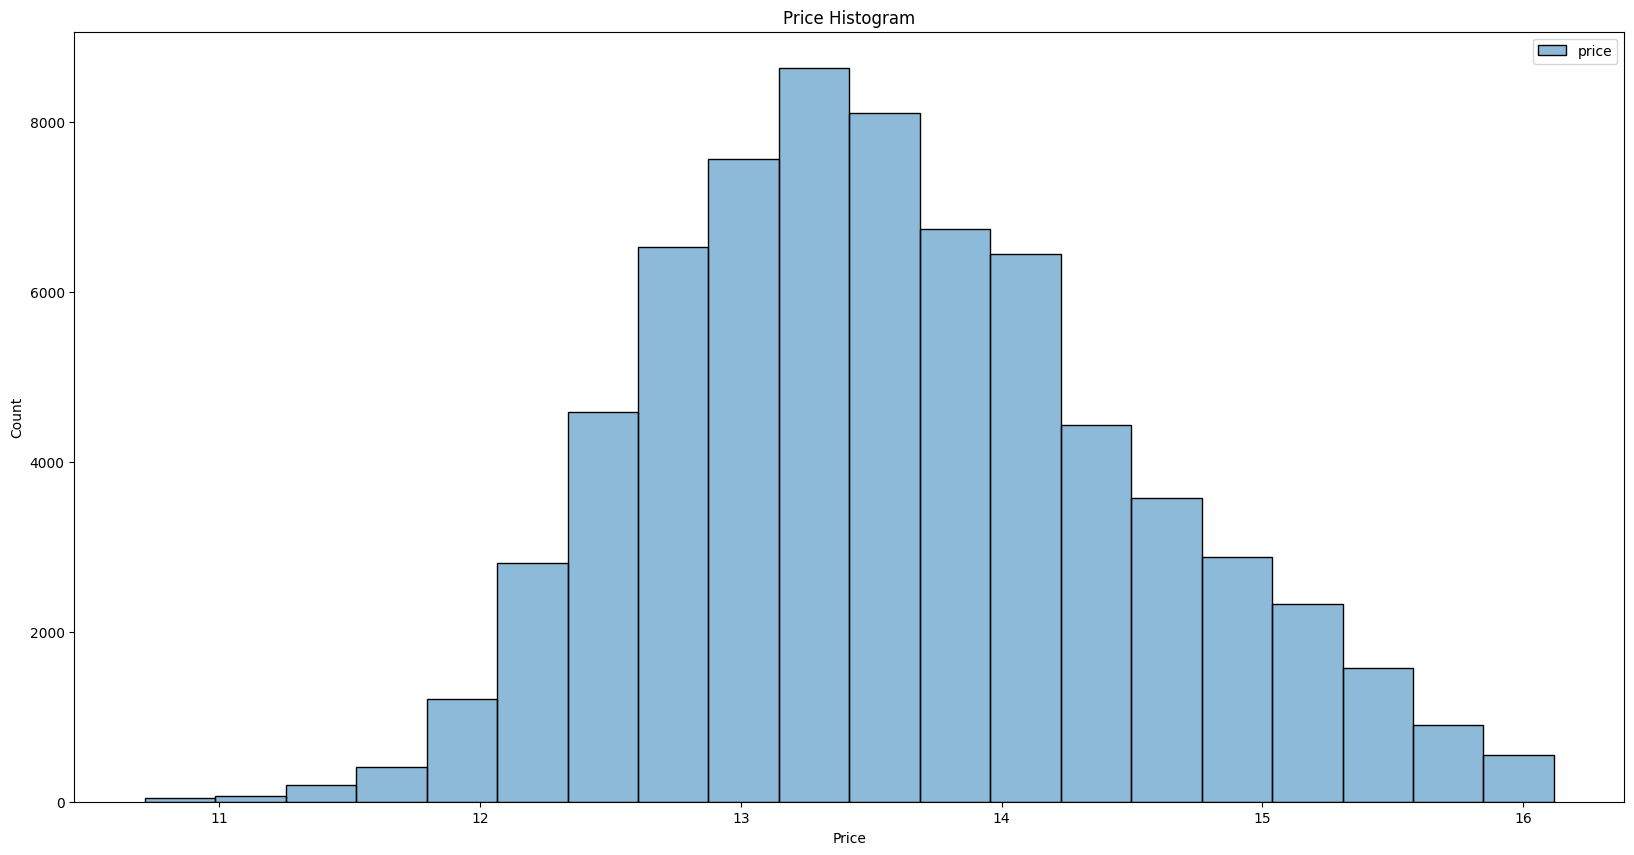

In [47]:
ax = sns.histplot(data=data_transf.price, bins=20)
ax.figure.set_size_inches(20,10)
ax.set_title('Price Histogram')
ax.set_xlabel('Price');

### Dumies Variables

In [48]:
# checking categorical vars
cat_var = data_transf.select_dtypes(include=['object']).columns
cat_var

MultiIndex([( 'unit',),
            ('usage',),
            ( 'zone',)],
           )

In [50]:
data_transf.usage.value_counts()

(usage,)   
Residencial    69588
dtype: int64